In [ ]:
#import requires libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from wordcloud import WordCloud
import nltk
import re
from wordcloud import WordCloud



In [ ]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.utils import to_categorical
from tensorflow.keras import regularizers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Embedding,LSTM,Conv1D,MaxPool1D
from sklearn.metrics import classification_report,accuracy_score

Explore fake news dataset

In [ ]:
#explore fake dataset
fake = pd.read_csv("Fake_data.csv")
fake.head()

ParserError: ignored

In [ ]:
fake.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
#types of subjects in fake data
fake["subject"].value_counts()

News               9050
politics           6841
left-news          4459
Government News    1570
US_News             783
Middle-east         778
Name: subject, dtype: int64

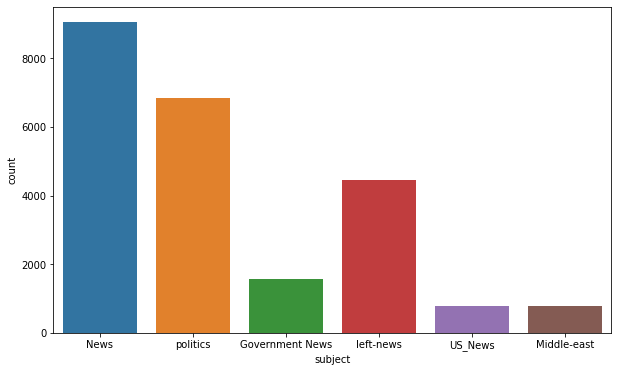

In [ ]:
plt.figure(figsize =(10,6))
sns.countplot(x = "subject" ,data = fake)

WORLDCLOUD

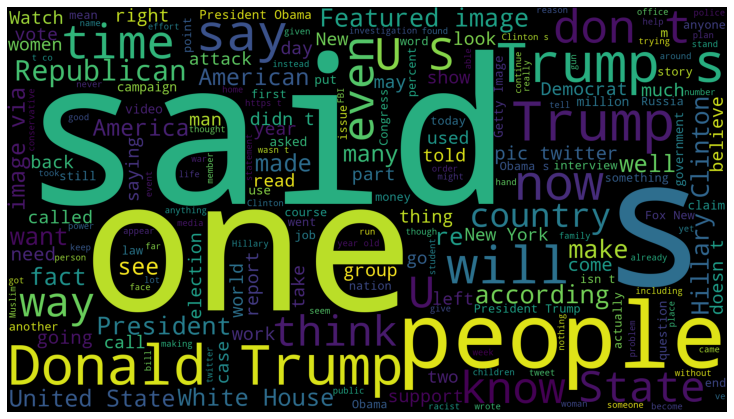

In [ ]:
 #convert text column into list
 ls = fake["text"].tolist()
 #join the list into a string
 text = " ".join(ls)
 wordcloud = WordCloud(width = 1920,height = 1080).generate(text)
 fig = plt.figure(figsize = (10,20))
 plt.imshow(wordcloud)
 plt.axis("off")
 plt.tight_layout(pad = 0)
 plt.show()



Explore real news dataset

In [ ]:
true = pd.read_csv("True_data.csv")
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [ ]:
#columns in true data set
true.columns

Index(['title', 'text', 'subject', 'date'], dtype='object')

In [ ]:
#types of subjects in true data
true["subject"].value_counts()

politicsNews    11272
worldnews       10145
Name: subject, dtype: int64

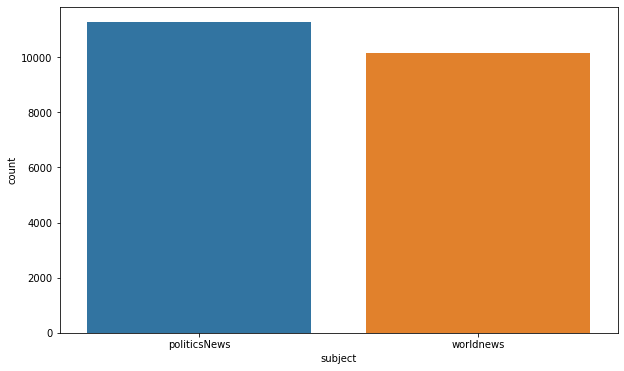

In [ ]:
plt.figure(figsize =(10,6))
sns.countplot(x = "subject" ,data = true)

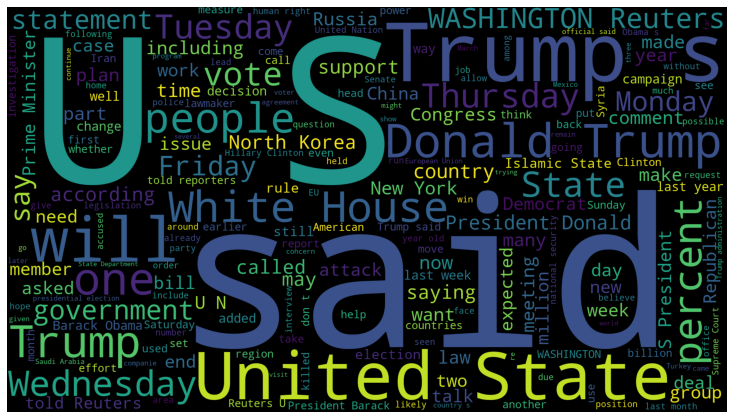

In [ ]:
#creating wordcloud for true news
#convert text column into list
ls = true["text"].tolist()
#join the list into a string
text = " ".join(ls)
wordcloud = WordCloud(width = 1920,height = 1080).generate(text)
fig = plt.figure(figsize = (10,20))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
plt.show()

Difference in Text
Real news seems to have source of publications  which is not present in fake dataset
Looking at the data:


*  most of the text contains reuters information such as "WASHINGTON (reuters)"
*   Some text are tweets from twitter.
*   Few texts do not contain any publication information








Cleaning Of Data
Removing reuters or twitter tweet information from the text .


*   text can b.e splitted only once at "-" which is always present after mentioning source of publication, this gives us publication part and the text part
*  If we do not get the text part , this means publication details was not given for that record.




*  The Twitter tweets always have some source, a long text of max 259 characters







In [ ]:
true.sample(5)

,title,text,subject,date
16381,Islamic State claims responsibility for attack...,CAIRO (Reuters) - Islamic State has claimed re...,worldnews,"October 26, 2017"
17681,Indian court acquits dentist couple of killing...,NEW DELHI (Reuters) - An Indian court on Thurs...,worldnews,"October 12, 2017"
11837,Russia working on defensive measures to counte...,MOSCOW (Reuters) - Russia is working on defens...,worldnews,"December 20, 2017"
20482,U.S. denies Iran report of confrontation with ...,BEIRUT (Reuters) - An Iranian military vessel ...,worldnews,"September 10, 2017"
15667,Saudi Arabia says it intercepts missile close ...,RIYADH (Reuters) - Saudi Arabia s air defense ...,worldnews,"November 4, 2017"


In [ ]:
# creating a list of indexes that do not have publications
unknown_publishers = []
for index, row in enumerate(true.text.values):
  try:
    record = row.split("-", maxsplit = 1)
    record[1]
    assert(len(record[0])<120)
  except:
    unknown_publishers.append(index)



In [ ]:
len(unknown_publishers)

222

In [ ]:
#list the text of unknown publishers
true.iloc[unknown_publishers].text

7        The following statements were posted to the ve...
8        The following statements were posted to the ve...
12       The following statements were posted to the ve...
13       The following statements were posted to the ve...
14        (In Dec. 25 story, in second paragraph, corre...
                               ...                        
20135     (Story corrects to million from billion in pa...
20500     (This Sept 8 story corrects headline, clarifi...
20667     (Story refiles to add dropped word  not , in ...
21246     (Story corrects third paragraph to show Mosul...
21339     (Story corrects to fix spelling in paragraph ...
Name: text, Length: 222, dtype: object

In [ ]:
#list of known publishers
publishers = []
tmp_text =[]

for index , row in enumerate (true.text.values):
  if index in unknown_publishers:
    tmp_text.append(row)
    publishers.append("unknown")
    
  else:
      record = row.split("-",maxsplit = 1)
      publishers.append(record[0].strip())
      tmp_text.append(record[1].strip())


In [ ]:
true["publishers"] = publishers
true["text"] = tmp_text

In [ ]:
true.head()

,title,text,subject,date,publishers
0,"As U.S. budget fight looms, Republicans flip t...",The head of a conservative Republican faction ...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
1,U.S. military to accept transgender recruits o...,Transgender people will be allowed for the fir...,politicsNews,"December 29, 2017",WASHINGTON (Reuters)
2,Senior U.S. Republican senator: 'Let Mr. Muell...,The special counsel investigation of links bet...,politicsNews,"December 31, 2017",WASHINGTON (Reuters)
3,FBI Russia probe helped by Australian diplomat...,Trump campaign adviser George Papadopoulos tol...,politicsNews,"December 30, 2017",WASHINGTON (Reuters)
4,Trump wants Postal Service to charge 'much mor...,President Donald Trump called on the U.S. Post...,politicsNews,"December 29, 2017",SEATTLE/WASHINGTON (Reuters)


In [ ]:
true.shape

(21417, 5)

In [ ]:
#to check whether fake news dataset has any empty text field 
empty_fake_index = [index for index,text in enumerate(fake.text.tolist()) if str(text).strip()== ""]
fake.iloc[empty_fake_index]

,title,text,subject,date
10923,TAKE OUR POLL: Who Do You Think President Trum...,,politics,"May 10, 2017"
11041,Joe Scarborough BERATES Mika Brzezinski Over “...,,politics,"Apr 26, 2017"
11190,WATCH TUCKER CARLSON Scorch Sanctuary City May...,,politics,"Apr 6, 2017"
11225,MAYOR OF SANCTUARY CITY: Trump Trying To Make ...,,politics,"Apr 2, 2017"
11236,SHOCKER: Public School Turns Computer Lab Into...,,politics,"Apr 1, 2017"
...,...,...,...,...
21816,BALTIMORE BURNS: MARYLAND GOVERNOR BRINGS IN N...,,left-news,"Apr 27, 2015"
21826,FULL VIDEO: THE BLOCKBUSTER INVESTIGATION INTO...,,left-news,"Apr 25, 2015"
21827,(VIDEO) HILLARY CLINTON: RELIGIOUS BELIEFS MUS...,,left-news,"Apr 25, 2015"
21857,(VIDEO)ICE PROTECTING OBAMA: WON’T RELEASE NAM...,,left-news,"Apr 14, 2015"


In [ ]:
#the text of these rows seems to be present in the title 
#removing the rows with empty text field
true["text"] = true["title"] + " " + true["text"]
fake["text"] = fake["title"] + " " + fake["text"]

In [ ]:
#preprocessing 
#converting all the text to lower

true['text'] = true['text'].apply(lambda x:str(x).lower())
fake['text'] = fake['text'].apply(lambda x:str(x).lower())

PREPROCESSING TEXT

In [ ]:
#assigning labels to the news
true['class'] = 1
fake['class'] = 0

In [ ]:
true.columns


Index(['title', 'text', 'subject', 'date', 'publishers', 'class'], dtype='object')

In [ ]:
#getting the required columns
Ttrue = true [['text' , 'class']]
Ffake = fake [['text' , 'class']]
#append the true and the fake and true data together
data = Ttrue.append(Ffake,ignore_index = True)

In [ ]:
!pip install spacy==2.2.3
!python -m spacy download en_core_web_sm
!pip install beautifulsoup4==4.9.1
!pip install textblob==0.15.3
!pip install git+https://github.com/laxmimerit/preprocess_kgptalkie.git --upgrade --force-reinstall

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 10.4 MB 19.1 MB/s 
     |████████████████████████████████| 184 kB 73.9 MB/s 
     |████████████████████████████████| 3.7 MB 63.5 MB/s 
     |████████████████████████████████| 2.2 MB 64.8 MB/s 
  Attempting uninstall: srsly
    Found existing installation: srsly 2.4.4
    Uninstalling srsly-2.4.4:
      Successfully uninstalled srsly-2.4.4
  Attempting uninstall: blis
    Found existing installation: blis 0.7.8
    Uninstalling blis-0.7.8:
      Successfully uninstalled blis-0.7.8
  Attempting uninstall: thinc
    Found existing installation: thinc 8.1.0
    Uninstalling thinc-8.1.0:
      Successfully uninstalled thinc-8.1.0
  Attempting uninstall: catalogue
    Found existing installation: catalogue 2.0.8
    Uninstalling catalogue-2.0.8:
      Successfully uninstalled catalogue-2.0.8
  Attempting uninstall: spacy
    Found existing installation: s

In [ ]:
#removing special characters 
import preprocess_kgptalkie as ps
data["text"] = data["text"].apply(lambda x : ps.remove_special_chars(x))


#converting text data into numerical data


Word2vec is one of the most popular technique to learn word embeddings using shallow neural network. It was developed by Thomas Mikolov in 2013 at Google.
Word embedding is one of the most popular representation of the document vocabulary.It is capable of capturing the context of the word in a document , sematics and syntactic similarity ,relation with other words etc. 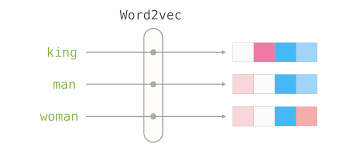

In [ ]:
# word to vec using gensim  library
import gensim
y = data["class"].values
#x is list of words
x = [d.split() for d in data["text"].tolist()]

In [ ]:
# word will be converted into sequence of 100 vectors
DIM = 100
w2v_model = gensim.models.Word2Vec(sentences = x,size = DIM ,window = 10, min_count = 1)

In [ ]:
len(w2v_model.wv.vocab)


231911

In [ ]:
w2v_model.wv["love"]

array([ 3.5944486 , -1.8974477 ,  0.6134689 ,  1.7530025 ,  3.3368042 ,
       -0.39093366, -0.5385132 , -0.72110677,  1.648231  ,  1.7328237 ,
        1.0397999 ,  0.79065317,  1.0011543 , -4.372465  ,  0.86179453,
        3.6189458 ,  4.004122  ,  1.1303083 , -3.7404487 ,  2.237371  ,
       -0.1548681 ,  2.2050915 ,  1.254187  ,  2.5307417 , -4.727422  ,
        0.32023948, -4.816633  ,  0.43988094,  0.8538828 ,  0.738446  ,
        1.3472669 , -1.2295475 ,  3.1961105 ,  1.7647461 , -1.6290295 ,
        0.40416428,  2.5856493 ,  0.51524574, -4.1503787 , -3.6836722 ,
        0.72222805,  0.9509332 ,  0.5473839 , -2.8076732 , -2.9981728 ,
        2.1511562 ,  1.6886003 ,  0.7227642 ,  1.9629478 , -1.8594106 ,
        0.68581676,  3.7605042 ,  0.52036464, -0.13485023,  0.2804288 ,
        1.2127653 ,  2.9439912 , -2.2483604 , -0.90852803, -2.251608  ,
       -0.9389566 , -2.1081698 ,  2.8004704 , -0.8860094 , -1.6438048 ,
        0.9026037 ,  1.7172283 ,  0.46738437, -3.911442  ,  1.98

In [ ]:
#exploring the vectors
w2v_model.wv["india"]
w2v_model.wv.most_similar("india")

[('pakistan', 0.7316217422485352),
 ('malaysia', 0.6988524794578552),
 ('indias', 0.6500610113143921),
 ('china', 0.649399995803833),
 ('modi', 0.6340451240539551),
 ('thailand', 0.6177890300750732),
 ('asia', 0.6161843538284302),
 ('norway', 0.610034167766571),
 ('australia', 0.6041556596755981),
 ('narendra', 0.6000600457191467)]

In [ ]:
w2v_model.wv.most_similar("china")

[('beijing', 0.8401693105697632),
 ('taiwan', 0.8158223628997803),
 ('chinas', 0.7654757499694824),
 ('chinese', 0.7076631188392639),
 ('japan', 0.6814153790473938),
 ('pyongyang', 0.6770667433738708),
 ('india', 0.6494000554084778),
 ('xi', 0.6452338099479675),
 ('beijings', 0.6409957408905029),
 ('taipei', 0.6343588829040527)]

In [ ]:
w2v_model.wv.most_similar("modi")

[('narendra', 0.7679880857467651),
 ('modis', 0.6741420030593872),
 ('india', 0.6340451836585999),
 ('indias', 0.5964399576187134),
 ('abe', 0.5794602632522583),
 ('tokyo', 0.567866861820221),
 ('najib', 0.5659341812133789),
 ('premier', 0.5508210062980652),
 ('japans', 0.5408322215080261),
 ('beijing', 0.5283215045928955)]

In [ ]:
w2v_model.wv.most_similar("trump")

[('trumps', 0.7316962480545044),
 ('trumpthe', 0.6166747212409973),
 ('he', 0.550421953201294),
 ('presidentelects', 0.5416963696479797),
 ('trumptrump', 0.5341715812683105),
 ('him', 0.5266319513320923),
 ('rumsfeld', 0.5146233439445496),
 ('presidentelect', 0.5080731511116028),
 ('cruz', 0.5031722784042358),
 ('his', 0.4992925524711609)]

To train the dataset we will will feed the vectors as initial weight to our training model

In [ ]:
tokenizer = Tokenizer()
tokenizer.fit_on_texts(x)

In [ ]:
#vectors to sequence for the dataset
x = tokenizer.texts_to_sequences(x)
#x

In [ ]:
#tokenizer.word_index

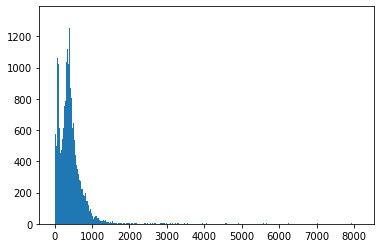

In [ ]:
#histogram to show total numbers of words in the news
plt.hist([len(i) for i in x],bins = 700)
plt.show()

In [ ]:
#truncate news with more than 1000 words
nos = np.array([len(i) for i in x])
nos[nos>1000]
len(nos[nos>1000])

1584

In [ ]:
maxlen = 1000
x = pad_sequences(x,maxlen = maxlen)

In [ ]:
len(x[101])

1000

feeding the vectors as initial weight to the training model

In [ ]:
vocab_size = len(tokenizer.word_index)+1
vocab = tokenizer.word_index

In [ ]:
#getting the weight matrix
def get_weight_matrix(model):
  weight_matrix = np.zeros((vocab_size,DIM))
  for word, i in vocab.items():
    weight_matrix[i] = model.wv[word]
  
  return weight_matrix


In [ ]:
embedding_vectors = get_weight_matrix(w2v_model)

In [ ]:
#shape of embediding vector
embedding_vectors.shape

(231912, 100)

In [ ]:
#model architecture
model = Sequential()
model.add(Embedding(vocab_size,output_dim = DIM,weights = [embedding_vectors],input_length = maxlen,trainable = False))
model.add(LSTM(units = 128))
model.add(Dense(1,activation = "sigmoid"))
model.compile(optimizer = "adam", loss = "binary_crossentropy",metrics = ["acc"])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 embedding (Embedding)       (None, 1000, 100)         23191200  
                                                                 
 lstm (LSTM)                 (None, 128)               117248    
                                                                 
 dense (Dense)               (None, 1)                 129       
                                                                 
Total params: 23,308,577
Trainable params: 117,377
Non-trainable params: 23,191,200
_________________________________________________________________


In [ ]:
#splitting the dataset into training and testing data
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

In [ ]:
model.fit(x_train, y_train,validation_split = 0.3,epochs = 6)

Epoch 1/6
688/688 [==============================] - 42s 51ms/step - loss: 0.1318 - acc: 0.9523 - val_loss: 0.0760 - val_acc: 0.9769
Epoch 2/6
688/688 [==============================] - 35s 51ms/step - loss: 0.0539 - acc: 0.9818 - val_loss: 0.0501 - val_acc: 0.9840
Epoch 3/6
688/688 [==============================] - 35s 51ms/step - loss: 0.0270 - acc: 0.9910 - val_loss: 0.0279 - val_acc: 0.9906
Epoch 4/6
688/688 [==============================] - 35s 51ms/step - loss: 0.0260 - acc: 0.9912 - val_loss: 0.0352 - val_acc: 0.9880
Epoch 5/6
688/688 [==============================] - 36s 53ms/step - loss: 0.0267 - acc: 0.9917 - val_loss: 0.0382 - val_acc: 0.9879
Epoch 6/6
688/688 [==============================] - 35s 51ms/step - loss: 0.0115 - acc: 0.9963 - val_loss: 0.0224 - val_acc: 0.9925


In [ ]:
#validating training data
y_pred_Train= (model.predict(x_train) >= 0.5).astype(int)

In [ ]:
#validatimg test data
y_pred_Test = (model.predict(x_test) >= 0.5).astype(int)

In [ ]:
#classification report of training data
print(classification_report(y_train,y_pred_Train))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     16381
           1       1.00      1.00      1.00     15047

    accuracy                           1.00     31428
   macro avg       1.00      1.00      1.00     31428
weighted avg       1.00      1.00      1.00     31428



In [ ]:
#classification report of testing data
print(classification_report(y_test,y_pred_Test))

              precision    recall  f1-score   support

           0       0.99      0.99      0.99      7100
           1       0.99      0.99      0.99      6370

    accuracy                           0.99     13470
   macro avg       0.99      0.99      0.99     13470
weighted avg       0.99      0.99      0.99     13470



In [ ]:
#converting the random news into sequences
rand= ["this is a news"]
rand = tokenizer.texts_to_sequences(rand)
rand = pad_sequences(rand,maxlen = maxlen)

In [ ]:
#model being used to predict the result
result = (model.predict(rand) >= 0.5).astype(int)
result


array([[0]])

In [ ]:
if result[[0]] == 0:
  print("false")
else:
  print("True")

false


In [ ]:
rand = ["India today reported 3,714 new coronavirus infections, taking the tally of COVID-19 cases to 4,31,85,049, according to the Union Health Ministry data updated"]
rand = tokenizer.texts_to_sequences(rand)
rand = pad_sequences(rand,maxlen = maxlen)
result = (model.predict(rand) >= 0.5).astype(int)
result
if result[[0]] == 0:
  print("false")
else:
  print("True")

True


In [ ]:
# Constructing the confusion matrix.
from sklearn.metrics import confusion_matrix
confusion_matrix(y_train, y_pred_Train)

array([[16350,    31],
       [   60, 14987]])